In [1]:
# Play with Beaching #

In [59]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from pathlib import Path
import xarray as xr

#from salishsea_tools import viz_tools

In [58]:
plt.rcParams.update({'font.size': 16, 'axes.titlesize': 'medium'})

In [32]:
def set_aspect(
    axes,
    aspect=5/4.4,
    coords='grid',
    lats=None,
    adjustable='box',
):
    """Set the aspect ratio for the axes.
    This is a thin wrapper on the :py:meth:`matplotlib.axes.Axes.set_aspect`
    method.
    Its primary purpose is to free the user from needing to remember the
    5/4.4 nominal aspect ratio for the Salish Sea NEMO model grid,
    and the formula for the aspect ratio based on latitude for map
    coordinates.
    It also sets the axes aspect ratio with :py:attr:`adjustable='box-forced'`
    so that the axes can be shared if desired.
    :arg axes: Axes instance to set the aspect ratio of.
    :type axes: :py:class:`matplotlib.axes.Axes`
    :arg aspect: Aspect ratio.
    :type aspect: float
    :arg coords: Type of plot coordinates to set the aspect ratio for;
                 either :kbd:`grid` (the default) or :kbd:`map`.
    :type coords: str
    :arg lats: Array of latitude values to calculate the aspect ratio
                    from; only required when :kbd:`coordinates='map'`.
    :type lats: :py:class:`numpy.ndarray`
    :arg adjustable: How to adjust the axes box.
    :type adjustable: str
    :returns: Aspect ratio.
    :rtype: float
    .. note::
        To explicitly set the aspect ratio for map coordinates
        (instead of calculating it from latitudes)
        set :kbd:`aspect` to the aspect ratio,
        :kbd:`coords='map'`,
        and use the default :kbd:`lats=None`.
    """
    if coords == 'map' and lats is not None:
        aspect = 1 / np.cos(np.median(lats) * np.pi / 180)
    axes.set_aspect(aspect, adjustable=adjustable)
    return aspect

In [17]:
mesh = xr.open_dataset('/home/allen/MEOPAR/grid/mesh_mask201702.nc')
land = mesh.tmask[0, 0]
nav_lat = mesh.nav_lat
nav_lon = mesh.nav_lon
nav_lat.shape

(898, 398)

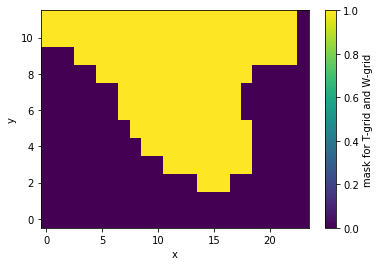

In [6]:
# Kits
imin, imax = 448, 460
jmin, jmax = 321, 345
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
#viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

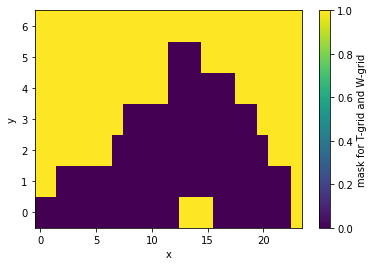

In [7]:
# Orcas
imin, imax = 320, 327
jmin, jmax = 284, 308
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
#viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

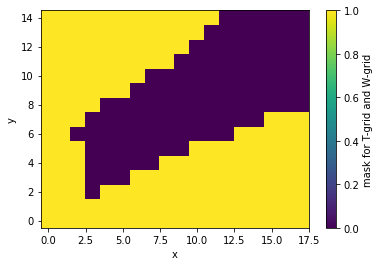

In [8]:
# Lummi
imin, imax = 305, 320
jmin, jmax = 337, 355
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
#viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

<ipython-input-33-aed8dd4e10ad>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(nav_lon[imin:imax, jmin:jmax], nav_lat[imin:imax, jmin:jmax], land[imin:imax, jmin:jmax])


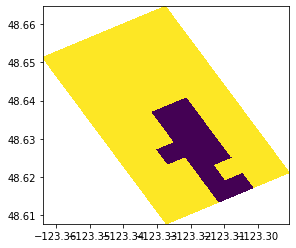

In [33]:
# Sidney Island
imin, imax = 333, 345
jmin, jmax = 227, 235
fig, ax = plt.subplots(1, 1)
#land[imin:imax, jmin:jmax].plot(ax=ax)
ax.pcolormesh(nav_lon[imin:imax, jmin:jmax], nav_lat[imin:imax, jmin:jmax], land[imin:imax, jmin:jmax])
set_aspect(ax, coords='map');
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

values = np.ma.masked_array(np.ones_like(land[imin:imax, jmin:jmax]), mask=1-land[imin:imax, jmin:jmax])

np.ma.notmasked_edges(values)

In [28]:
minoil = 5

In [29]:
colours = {'bunker': 'blue',
           'other': 'blue',
           'akns': 'navy',
           'diesel': 'skyblue',
           'gas': 'skyblue',
           'jet': 'skyblue',
           'dilbit': 'navy',
           }
colours['bunker']
data.OilType.item()

NameError: name 'data' is not defined

In [30]:
month_colours = ['slateblue', 'slateblue', 'lawngreen', 'lawngreen', 'indianred', 'indianred',
                 'goldenrod', 'goldenrod', 'goldenrod', 'darkorchid', 'darkorchid', 'slateblue']

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
-124.5592473 -122.4917603 47.92281723 49.52669271


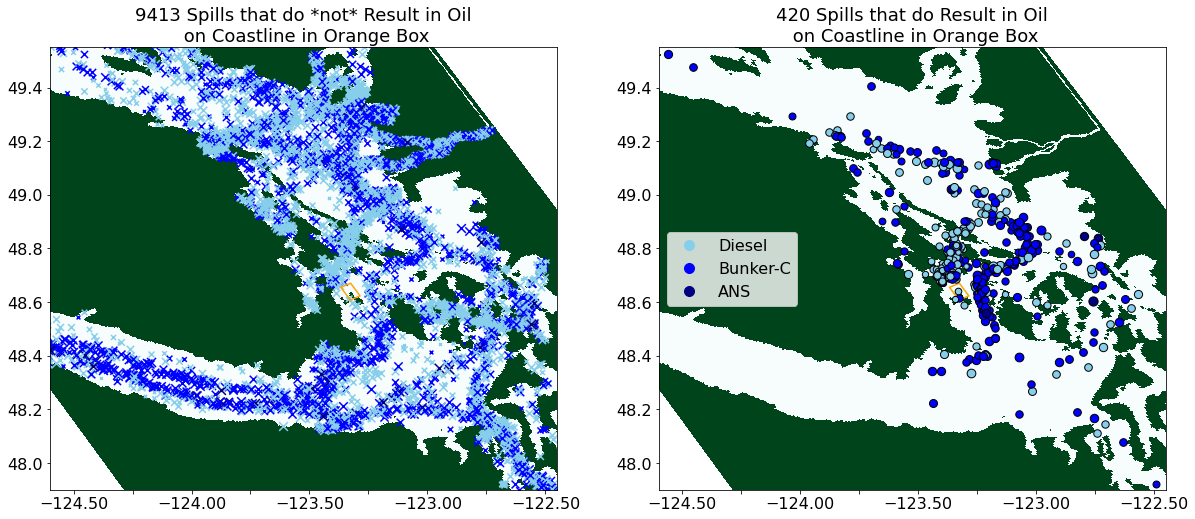

In [66]:
scale = 5
scount = 0
ncount = 0
min_lon = 0
max_lon = -1000
min_lat = 1000
max_lat = 0
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
for ax in axs:
    ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, land[:-1,:-1], cmap='BuGn_r')
direct = Path('/scratch/allen/MIDOSS/aggregate/beaching_files/')
for file in direct.glob('Beaching*try3*.nc'):
    data = xr.open_dataset(file)
#    month = data.Spilldatetime.values.astype('datetime64[M]').astype(int) % 12
    if (np.ma.masked_array(data.Beaching_Volume, mask=data.Beaching_Volume < minoil/1000.) * 
        mymask[1:-1, 1:-1]).sum(axis=0).sum(axis=0) > 0 :
        
        axs[1].scatter(data.SpillLon, data.SpillLat, marker='o', c=colours[data.OilType.item()], 
                   s=np.log(1000*data.SpillVolume.item())*scale,
               edgecolors='k', zorder=3)
        scount = scount + 1
        max_lon = max(max_lon, data.SpillLon) 
        min_lon = min(min_lon, data.SpillLon)
        max_lat = max(max_lat, data.SpillLat) 
        min_lat = min(min_lat, data.SpillLat)
    else:
        axs[0].scatter(data.SpillLon, data.SpillLat, marker='x', c=colours[data.OilType.item()], 
                   s=np.log(1000*data.SpillVolume.item())*scale)
        ncount = ncount + 1
        if (int(ncount/200)*200 == ncount):
            print(ncount)
        
    data.close()
for ax in axs:
    ax.set_xlim(-124.6, -122.45)
    ax.set_ylim(47.9, 49.55)
    ax.plot([mesh.nav_lon[imin, jmin], mesh.nav_lon[imin, jmax], mesh.nav_lon[imax, jmax], 
             mesh.nav_lon[imax, jmin], mesh.nav_lon[imin, jmin]],
            [mesh.nav_lat[imin, jmin], mesh.nav_lat[imin, jmax], mesh.nav_lat[imax, jmax], 
             mesh.nav_lat[imax, jmin], mesh.nav_lat[imin, jmin]],
            color='orange')
    set_aspect(ax, coords='map');
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)
axs[0].set_title(f'{ncount} Spills that do *not* Result in Oil\n on Coastline in Orange Box',
                fontsize=18)
axs[1].set_title(f'{scount} Spills that do Result in Oil\n on Coastline in Orange Box',
                fontsize=18);
print (min_lon.item(), max_lon.item(), min_lat.item(), max_lat.item())
diesel_marker = mlines.Line2D([], [], color=colours['diesel'], marker='o', linestyle='None',
                          markersize=10, label='Diesel')
bunker_marker = mlines.Line2D([], [], color=colours['bunker'], marker='o', linestyle='None',
                          markersize=10, label='Bunker-C')
akns_marker = mlines.Line2D([], [], color=colours['akns'], marker='o', linestyle='None',
                          markersize=10, label='ANS')
axs[1].legend(handles=[diesel_marker, bunker_marker, akns_marker], loc='center left')

fig.savefig('Sidney3.png')

In [57]:
min_lat.item()

47.92281723

In [37]:
data

<xarray.Dataset>
Dimensions:          (grid_x: 396, grid_y: 896)
Coordinates:
  * grid_y           (grid_y) int16 0 1 2 3 4 5 6 ... 890 891 892 893 894 895
  * grid_x           (grid_x) int16 0 1 2 3 4 5 6 ... 390 391 392 393 394 395
Data variables:
    Beaching_Volume  (grid_y, grid_x) float64 ...
    Beaching_Time    (grid_y, grid_x) datetime64[ns] ...
    OilType          object ...
    SpillVolume      float64 ...
    SpillLon         float64 ...
    SpillLat         float64 ...
    Spilldatetime    datetime64[ns] ...
Attributes:
    acknowledgements:      MOHID output
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://ubc-moad-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    summary:               Beaching Time and Volume from a Specific Run
    source:                analysis-susan/notebooks/MOHID/SaveBeaching.py
    history:               [2022-04-21] File creation.

In [171]:
mydate = data.Spilldatetime.values
mydate

numpy.datetime64('2017-07-04T09:30:00.000000000')

In [168]:
dt.datetime.fromtimestamp(mydate)

OSError: [Errno 75] Value too large for defined data type

In [175]:
data.Spilldatetime.values.astype('datetime64[M]').astype(int) % 12 + 1

7

In [173]:
months

1